In [1]:
import os
import json
from fabrictestbed.slice_manager import SliceManager, Status

In [2]:
credmgr_host = os.environ['FABRIC_CREDMGR_HOST']
orchestrator_host = os.environ['FABRIC_ORCHESTRATOR_HOST']
print(f"CM Host: {credmgr_host} Orchestrator Host: {orchestrator_host}")

CM Host: beta-2.fabric-testbed.net Orchestrator Host: beta-7.fabric-testbed.net


In [3]:
# create and initialize the slice manager

slice_manager = SliceManager(oc_host = orchestrator_host, cm_host = credmgr_host, project_name = 'all', scope = 'all')
slice_manager.initialize()

In [4]:
status, advertised_topology = slice_manager.resources()

print(f"Status: {status}")
if status == Status.OK:
    print(f"Topology: {advertised_topology}")
else:
    print(f"Error: {advertised_topology}")

Status: Status.OK
Topology: UKY: { cpu: 6/6 , core: 186/192 , ram: 1,518/1,536 G, disk: 9,570/9,600 G, unit: 3/3 }
	Components:
		GPU-RTX6000:  GPU RTX6000 { unit: 2/2 }
		GPU-Tesla T4:  GPU Tesla T4 { unit: 4/4 }
		NVME-P4510:  NVME P4510 { disk: 8,000/10,000 G, unit: 8/10 }
		SharedNIC-ConnectX-6:  SharedNIC ConnectX-6 { unit: 379/381 }
		SmartNIC-ConnectX-6:  SmartNIC ConnectX-6 { unit: 2/2 }
		SmartNIC-ConnectX-5:  SmartNIC ConnectX-5 { unit: 2/2 }
	Site Interfaces:
		UKY_LBNL: TrunkPort { bw: 100/100 Gbps}
RENC
	Components:
	Site Interfaces:
STAR
	Components:
	Site Interfaces:
LBNL: { cpu: 6/6 , core: 180/192 , ram: 1,500/1,536 G, disk: 9,540/9,600 G, unit: 3/3 }
	Components:
		NVME-P4510:  NVME P4510 { disk: 7,000/10,000 G, unit: 7/10 }
		GPU-RTX6000:  GPU RTX6000 { unit: 2/2 }
		GPU-Tesla T4:  GPU Tesla T4 { unit: 3/4 }
		SmartNIC-ConnectX-6:  SmartNIC ConnectX-6 { unit: 1/2 }
		SmartNIC-ConnectX-5:  SmartNIC ConnectX-5 { unit: 1/2 }
		SharedNIC-ConnectX-6:  SharedNIC ConnectX-6

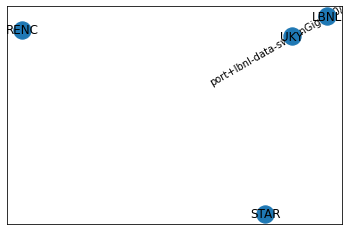

In [5]:
if status == Status.OK:
    advertised_topology.draw()

In [6]:
from fabrictestbed.slice_editor import ExperimentTopology, Capacities, ComponentType, ComponentModelType, ServiceType
# Create topology
t = ExperimentTopology()

# Add node
n1 = t.add_node(name='n1', site='UKY')

# Set capacities
cap = Capacities()
cap.set_fields(core=2, ram=6, disk=10)

# Set Properties
n1.set_properties(capacities=cap, image_type='qcow2', image_ref='default_centos_8')

# Add PCI devices
n1.add_component(ctype=ComponentType.NVME, model='P4510', name='c1')

# Add node
n2 = t.add_node(name='n2', site='LBNL')

# Set properties
n2.set_properties(capacities=cap, image_type='qcow2', image_ref='default_centos_8')


# Add node
n3 = t.add_node(name='n3', site='LBNL')

# Set properties
n3.set_properties(capacities=cap, image_type='qcow2', image_ref='default_centos_8')

# Shared Cards
n1.add_component(model_type=ComponentModelType.SmartNIC_ConnectX_6, name='n1-nic1')
n2.add_component(model_type=ComponentModelType.SmartNIC_ConnectX_6, name='n2-nic1')
n3.add_component(model_type=ComponentModelType.SmartNIC_ConnectX_6, name='n3-nic1')

# L2STS Service
t.add_network_service(name='sts1', nstype=ServiceType.L2STS,
                      interfaces=[n1.interface_list[0], n2.interface_list[0], n3.interface_list[0]])

# Generate Slice Graph
slice_graph = t.serialize()

ssh_key = None
with open ("/home/fabric/.ssh/id_rsa.pub", "r") as myfile:
    ssh_key=myfile.read()
    ssh_key=ssh_key.strip()

# Request slice from Orchestrator
status, reservations = slice_manager.create(slice_name='Slice-sts-ded', slice_graph=slice_graph, ssh_key=ssh_key)

print("Response Status {}".format(status))
if status == Status.OK:
    print("Reservations created {}".format(reservations))
else:
    print(f"Failure: {reservations}")

Response Status Status.OK
Reservations created [{
    "graph_node_id": "f09f4502-1cc0-464e-a082-d6b9467fc160",
    "lease_end": "2021-08-07 22:43:39",
    "pending_state": "None_",
    "reservation_id": "df356395-4d0a-452c-9ebd-4de05faed59f",
    "reservation_state": "Unknown",
    "slice_id": "c4668ac9-e9b2-41c5-8eff-218aad98edd9"
}, {
    "graph_node_id": "1b1e1f16-e21a-435a-be7c-b5b025df89a4",
    "lease_end": "2021-08-07 22:43:39",
    "pending_state": "None_",
    "reservation_id": "2e4cb077-b6e8-43a4-8091-170deee937b4",
    "reservation_state": "Unknown",
    "slice_id": "c4668ac9-e9b2-41c5-8eff-218aad98edd9"
}, {
    "graph_node_id": "6357ad11-f628-4c4b-8a62-5c8512d61f79",
    "lease_end": "2021-08-07 22:43:39",
    "pending_state": "None_",
    "reservation_id": "51f51d1f-399d-40f3-a0c0-ddfa9d1d3e86",
    "reservation_state": "Unknown",
    "slice_id": "c4668ac9-e9b2-41c5-8eff-218aad98edd9"
}, {
    "graph_node_id": "648cef53-53fc-43b4-8f0a-51fecf884848",
    "lease_end": "2021

In [7]:
x = ExperimentTopology()

# Add node
node1 = x.add_node(name='node1', site='LBNL')

# Set capacities
cap = Capacities()
cap.set_fields(core=2, ram=6, disk=10)

# Set Properties
node1.set_properties(capacities=cap, image_type='qcow2', image_ref='default_centos_8')

# Add PCI devices
node1.add_component(ctype=ComponentType.NVME, model='P4510', name='c1')

# Add node
node2 = x.add_node(name='node2', site='LBNL')

# Set properties
node2.set_properties(capacities=cap, image_type='qcow2', image_ref='default_centos_8')

# Shared Cards
node1.add_component(model_type=ComponentModelType.SharedNIC_ConnectX_6, name='node1-nic1')
node2.add_component(model_type=ComponentModelType.SharedNIC_ConnectX_6, name='node2-nic1')

# L2Bridge Service
x.add_network_service(name='bridge1', nstype=ServiceType.L2Bridge, interfaces=x.interface_list)

# Generate Slice Graph
slice_graph = x.serialize()

ssh_key = None
with open ("/home/fabric/.ssh/id_rsa.pub", "r") as myfile:
    ssh_key=myfile.read()
    ssh_key=ssh_key.strip()

# Request slice from Orchestrator
status, reservations = slice_manager.create(slice_name='Slice-l2bridge-sriov', slice_graph=slice_graph, ssh_key=ssh_key)

print("Response Status {}".format(status))
if status == Status.OK:
    print("Reservations created {}".format(reservations))
else:
    print(f"Failure: {reservations}")

Response Status Status.OK
Reservations created [{
    "graph_node_id": "7b518575-de4e-41ca-ac7f-29b1b4464b29",
    "lease_end": "2021-08-07 22:43:44",
    "pending_state": "None_",
    "reservation_id": "4d1db7f3-76f9-4572-8a7f-9a718fc04633",
    "reservation_state": "Unknown",
    "slice_id": "d1664743-1748-4f5a-a565-1083e0a6855c"
}, {
    "graph_node_id": "0e38eb30-7b59-4eee-9563-0361f6e1b023",
    "lease_end": "2021-08-07 22:43:44",
    "pending_state": "None_",
    "reservation_id": "cc5d1fd5-c09c-4fe6-b9df-614911f42439",
    "reservation_state": "Unknown",
    "slice_id": "d1664743-1748-4f5a-a565-1083e0a6855c"
}, {
    "graph_node_id": "1e945cf3-151c-41c6-90a2-9dc6c574eebe",
    "lease_end": "2021-08-07 22:43:44",
    "pending_state": "None_",
    "reservation_id": "4b8f1bd5-a1cc-4fb3-934b-ea9a685e3bed",
    "reservation_state": "Unknown",
    "slice_id": "d1664743-1748-4f5a-a565-1083e0a6855c"
}]


In [13]:
status, slices = slice_manager.slices()